# DBSCAN Clustering: Insider Detection with Rules-Based Features
## Using Volume/Trade Data, Financial Data, and Regex Features

## 1. Import Libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully")

Libraries loaded successfully


## 2. Load Data

In [104]:
# Load user data with regex features
df = pd.read_csv('outputs/output_with_signals.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nTotal users: {len(df)}")
df.head()

Dataset shape: (4834, 34)

Total users: 4834


,wallet,username,joined_text,profile_views_text,positions_count,active_markets_count,total_position_value,trades_count,buy_trades_count,sell_trades_count,...,winning_positions_count,win_rate,earnings_count,earnings_distinct_issuers,earnings_tickers_list,other_earnings_markets,traded_crypto,days_since_first_trade,total_markets_count,validation_errors
0,0x5513928c8ebb92172d6955bba40a875ec564a468,rkaushik,NaN,NaN,1,1,5.676055,20,11,9,...,3,0.4286,1,1,MAR,0,1,6,7,NaN
1,0xd3530424f60d27fcba24bed0b4c2445978956535,Vagabondvngdfg,NaN,NaN,1,1,21.157072,92,64,28,...,25,1.0000,26,26,"APO,BEN,BYND,CELH,CRSP,DDOG,FIS,HTZ,IEP,KKR,MA...",1,0,10,50,NaN
2,0x94a55518e05c15bed976193c99d7d14976f6615e,psychogambler,NaN,NaN,4,4,2399.980600,4,4,0,...,0,0.0000,4,4,"HOG,MAR,MPC,UBER",1,0,6,4,NaN
3,0xe746d19d2647edbaadd773dc3701d4feb29d728c,thekrac,NaN,NaN,6,6,68.561815,45,36,9,...,23,0.9200,33,33,"AAL,AMD,APO,ARES,BA,BEN,BYND,COUR,CVX,EL,F,FTD...",1,0,20,33,NaN
4,0x672225e5e1aba1c970ac613efd1505f4b7a10762,rebitewithloucura,NaN,NaN,0,0,0.000000,263,229,34,...,25,1.0000,47,47,"AAPL,ABNB,AKAM,ALL,AMD,AMZN,APO,ARES,BEN,BGC,C...",1,0,139,50,NaN


In [105]:
df2 = df[df["traded_crypto"].astype(int) != 1].copy()


df2 = df2[df2["other_earnings_markets"].astype(int) != 1].copy()

df2 = df2[df2["total_markets_count"].astype(int) <= 25].copy()

df2

,wallet,username,joined_text,profile_views_text,positions_count,active_markets_count,total_position_value,trades_count,buy_trades_count,sell_trades_count,...,winning_positions_count,win_rate,earnings_count,earnings_distinct_issuers,earnings_tickers_list,other_earnings_markets,traded_crypto,days_since_first_trade,total_markets_count,validation_errors
25,0xb9a061ac3b8bd28b2e6d57518ae6d1ed616c18b6,0xb9a061ac3b8bD28b2e6D57518AE6d1ed616C18B6-176...,NaN,NaN,4,4,1415.538896,4,4,0,...,0,0.0000,1,1,MAR,0,0,6,4,NaN
214,0xc9b4b54dcdc39e8d01f0982eb464be02560701cc,PIPI520,NaN,NaN,1,1,22.850569,17,9,8,...,0,0.0000,1,1,FIS,0,0,15,9,NaN
303,0x953bb74b4ac386045efc9eebbb497455db8527de,0x953bb74B4aC386045EFc9EEbBB497455DB8527DE-176...,NaN,NaN,10,10,470.250464,15,13,2,...,2,0.6667,1,1,CMG,0,0,12,13,NaN
392,0x51bd54cb1344442fe892d5f296ab16e0ba2dbc56,krill-zappers,NaN,NaN,2,2,190.000000,4,4,0,...,0,0.0000,1,1,WMB,0,0,8,2,NaN
393,0x143d7b404e109d636bca9fa92f97cdbf46275bc4,stucob.,NaN,NaN,1,1,143.000000,6,5,1,...,1,0.5000,1,1,WMB,0,0,14,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,0x1a55b70bab92746e98ef47bc453e8d57caeadf56,lh10163,NaN,NaN,0,0,0.000000,29,15,14,...,1,0.0833,1,1,SPCE,0,0,6,11,NaN
4761,0x3b62eb9f73d4bcbfd265872541b83aa784c5967f,hagqghsdh,NaN,NaN,0,0,0.000000,19,10,9,...,0,0.0000,1,1,SPCE,0,0,4,6,NaN
4764,0x2b8fcb521035183ca27fb903013ae8b161048164,Vendzurd,NaN,NaN,2,2,15.790938,6,4,2,...,1,0.5000,1,1,BYND,0,0,6,4,NaN
4765,0xa2be7e73927c38a6858a1f072c5dcd86f573aae6,0xA2BE7E73927C38a6858A1f072C5dcD86f573aAE6-176...,NaN,NaN,8,8,96.987928,38,27,11,...,14,0.7778,1,1,BYND,0,0,15,24,NaN


## 3. Feature Selection

In [127]:
# Define features for clustering
FEATURES = [
    # Volume/Trade features
    'trades_count',
    'buy_trades_count',
    'sell_trades_count',
    'total_volume',
    #'avg_trade_size',    
    # Financial features
    'realized_pnl',
    'total_position_value',
    'closed_positions_count',
    
    # Behavioral features
    'positions_count',
    'active_markets_count',
    'days_since_first_trade',
    'total_markets_count',
]

# Extract features
df_features = df2[FEATURES].copy()

# Handle missing values with median
df_features = df_features.fillna(df_features.median())

print(f"Total features: {len(FEATURES)}")
print(f"\nFeature statistics:")
df_features.describe()

Total features: 11

Feature statistics:


,trades_count,buy_trades_count,sell_trades_count,total_volume,realized_pnl,total_position_value,closed_positions_count,positions_count,active_markets_count,days_since_first_trade,total_markets_count
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,14.814961,10.330709,4.484252,6420.023653,87.396447,765.513931,6.250000,2.899606,2.891732,82.893701,8.588583
std,13.012254,8.928208,5.431458,16267.926536,919.439102,3078.903942,6.098994,3.890990,3.884183,142.713408,6.313164
min,0.000000,0.000000,0.000000,0.000000,-9012.456364,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,4.000000,0.000000,163.256524,-3.635132,2.375370,1.000000,1.000000,1.000000,9.000000,3.000000
50%,11.000000,7.000000,2.000000,1071.797495,0.000000,35.005618,5.000000,1.000000,1.000000,19.000000,7.000000
75%,22.000000,16.000000,7.000000,6207.952522,4.078418,225.167204,10.000000,4.000000,4.000000,42.000000,13.000000
max,88.000000,57.000000,33.000000,162628.361628,13639.448772,45531.210483,25.000000,24.000000,24.000000,1018.000000,25.000000


## 4. Scale Features

In [129]:
# Use RobustScaler (handles outliers better)
scaler = RobustScaler()
features_scaled = scaler.fit_transform(df_features)

df_scaled = pd.DataFrame(
    features_scaled,
    columns=df_features.columns,
    index=df_features.index
)

print(f"Features scaled using RobustScaler")
print(f"Scaled data shape: {df_scaled.shape}")

Features scaled using RobustScaler
Scaled data shape: (508, 11)


## 5. Run DBSCAN

In [134]:
# Run DBSCAN clustering
dbscan = DBSCAN(eps=4, min_samples=4)
cluster_labels = dbscan.fit_predict(df_scaled)

# Add cluster labels to dataframe
df2['cluster'] = cluster_labels

# Calculate statistics
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_anomalies = list(cluster_labels).count(-1)
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()

print(f"\nDBSCAN Results:")
print(f"  EPS: 3.0")
print(f"  Min Samples: 5")
print(f"  Total users: {len(df2)}")
print(f"  Number of clusters: {n_clusters}")
print(f"  Anomalies (cluster -1): {n_anomalies} ({100*n_anomalies/len(df2):.1f}%)")
print(f"\nCluster sizes:")
for cluster_id, size in cluster_sizes.items():
    cluster_name = "Anomalies" if cluster_id == -1 else f"Cluster {cluster_id}"
    print(f"  {cluster_name}: {size} users ({100*size/len(df2):.1f}%)")


DBSCAN Results:
  EPS: 3.0
  Min Samples: 5
  Total users: 508
  Number of clusters: 5
  Anomalies (cluster -1): 75 (14.8%)

Cluster sizes:
  Anomalies: 75 users (14.8%)
  Cluster 0: 401 users (78.9%)
  Cluster 1: 7 users (1.4%)
  Cluster 2: 13 users (2.6%)
  Cluster 3: 6 users (1.2%)
  Cluster 4: 6 users (1.2%)


## 6. Visualize with PCA

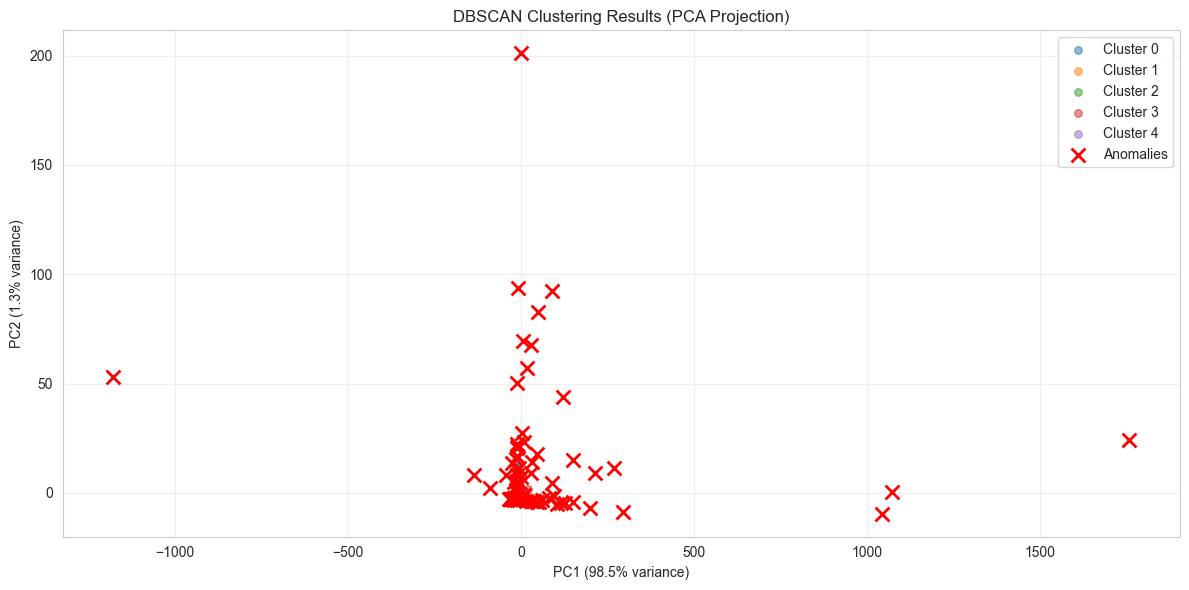


Visualization saved to outputs/dbscan_clusters_pca.png


In [135]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
features_2d = pca.fit_transform(df_scaled)

# Create plot
plt.figure(figsize=(12, 6))

# Plot normal clusters
for cluster_id in set(cluster_labels):
    if cluster_id == -1:
        continue
    mask = cluster_labels == cluster_id
    plt.scatter(features_2d[mask, 0], features_2d[mask, 1], 
                alpha=0.5, s=30, label=f'Cluster {cluster_id}')

# Plot anomalies
anomaly_mask = cluster_labels == -1
plt.scatter(features_2d[anomaly_mask, 0], features_2d[anomaly_mask, 1],
            c='red', marker='x', s=100, label='Anomalies', linewidths=2)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('DBSCAN Clustering Results (PCA Projection)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outputs/dbscan_clusters_pca.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nVisualization saved to outputs/dbscan_clusters_pca.png")

## 7. Analyze Anomalies

In [136]:
# Extract anomalies
anomalies_df = df2[df2['cluster'] == -1].copy()

print(f"Total anomalies detected: {len(anomalies_df)}")

if len(anomalies_df) > 0:
    # Show key features for anomalies
    print(f"\nAnomalies summary:")
    print(f"  Users with 2+ earnings issuers: {anomalies_df['other_earnings_markets'].sum()}")
    print(f"  Users with crypto trades: {anomalies_df['traded_crypto'].sum()}")
    print(f"  Avg earnings count: {anomalies_df['earnings_count'].mean():.1f}")
    print(f"  Avg win rate: {anomalies_df['win_rate'].mean():.2f}")
    print(f"  Avg realized P&L: ${anomalies_df['realized_pnl'].mean():.2f}")
    
    # Show top anomalies
    print(f"\nTop 10 anomalies by realized P&L:")
    display_cols = ['username', 'earnings_count', 'win_rate', 'realized_pnl', 
                    'total_volume', 'other_earnings_markets', 'traded_crypto']
    print(anomalies_df.nlargest(10, 'realized_pnl')[display_cols].to_string(index=False))
else:
    print("\nNo anomalies detected - try adjusting eps or min_samples")

Total anomalies detected: 75

Anomalies summary:
  Users with 2+ earnings issuers: 0
  Users with crypto trades: 0
  Avg earnings count: 1.0
  Avg win rate: 0.64
  Avg realized P&L: $554.85

Top 10 anomalies by realized P&L:
                                                username  earnings_count  win_rate  realized_pnl  total_volume  other_earnings_markets  traded_crypto
                                                 laksilm               1    0.8750  13639.448772  25049.544694                       0              0
                                       longregionalbanks               1    0.7500   8346.850210 162628.361628                       0              0
                                                 NES1000               1    0.4286   8126.254913  71289.345699                       0              0
                                             Sofi.Maniac               1    1.0000   2362.539134  13929.020881                       0              0
0x326fe03ABa2bCBF071149C9

## 8. Feature Importance for Anomalies


Feature comparison (Anomalies vs Normal):
                           Anomalies       Normal    Difference      Ratio
realized_pnl              554.852022     6.428391    548.423631  86.299310
total_position_value     4067.043549   193.655452   3873.388097  21.001333
total_volume            16215.779634  4723.299176  11492.480458   3.433146
active_markets_count        5.720000     2.401848      3.318152   2.380509
positions_count             5.720000     2.411085      3.308915   2.371392
buy_trades_count           15.386667     9.454965      5.931701   1.627192
trades_count               20.253333    13.872979      6.380354   1.459807
total_markets_count        11.200000     8.136259      3.063741   1.376385
days_since_first_trade    106.680000    78.773672     27.906328   1.354242
closed_positions_count      7.440000     6.043880      1.396120   1.230794


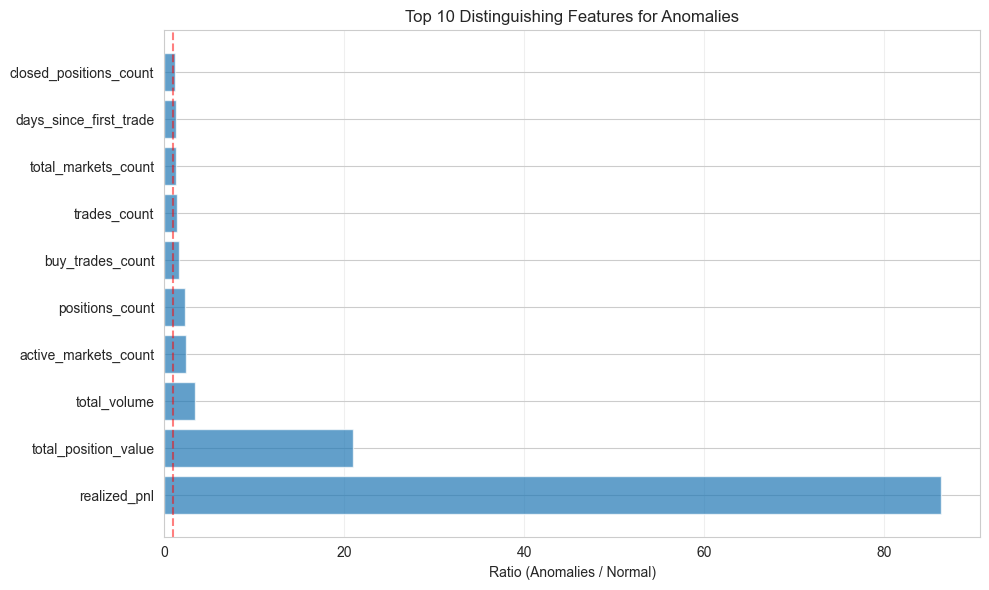


Feature importance saved to outputs/dbscan_feature_importance.png


In [137]:
if len(anomalies_df) > 0:
    # Compare anomalies vs normal users
    normal_df = df2[df2['cluster'] != -1]
    
    # Calculate mean differences
    comparison = pd.DataFrame({
        'Anomalies': anomalies_df[FEATURES].mean(),
        'Normal': normal_df[FEATURES].mean()
    })
    comparison['Difference'] = comparison['Anomalies'] - comparison['Normal']
    comparison['Ratio'] = comparison['Anomalies'] / (comparison['Normal'] + 0.001)
    comparison = comparison.sort_values('Ratio', ascending=False)
    
    print("\nFeature comparison (Anomalies vs Normal):")
    print(comparison.head(10).to_string())
    
    # Plot top differences
    fig, ax = plt.subplots(figsize=(10, 6))
    top_features = comparison.head(10)
    x = range(len(top_features))
    
    ax.barh(x, top_features['Ratio'], alpha=0.7)
    ax.set_yticks(x)
    ax.set_yticklabels(top_features.index)
    ax.set_xlabel('Ratio (Anomalies / Normal)')
    ax.set_title('Top 10 Distinguishing Features for Anomalies')
    ax.axvline(x=1.0, color='red', linestyle='--', alpha=0.5)
    ax.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig('outputs/dbscan_feature_importance.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\nFeature importance saved to outputs/dbscan_feature_importance.png")

## 9. Export Results

In [141]:
if len(anomalies_df) > 0:
    # Select relevant columns for export
    export_cols = ['wallet', 'username', 'cluster'] + FEATURES
    
    # Save anomalies
    output_path = 'outputs/dbscan_anomalies.csv'
    anomalies_df =anomalies_df.sort_values("realized_pnl", ascending=False, na_position="last")
    anomalies_df[export_cols].to_csv(output_path, index=False)
    print(f"Saved {len(anomalies_df)} anomalies to: {output_path}")
    
    # Save all users with cluster labels
    output_path_all = 'outputs/dbscan_all_users_clustered.csv'
    df2[export_cols].to_csv(output_path_all, index=False)
    print(f"Saved all {len(df2)} users with cluster labels to: {output_path_all}")
else:
    print("No anomalies to export")

Saved 75 anomalies to: outputs/dbscan_anomalies.csv
Saved all 508 users with cluster labels to: outputs/dbscan_all_users_clustered.csv


In [ ]:
anomalies_df =anomalies_df.sort_values("realized_pnl", ascending=False, na_position="last")

,wallet,username,joined_text,profile_views_text,positions_count,active_markets_count,total_position_value,trades_count,buy_trades_count,sell_trades_count,...,win_rate,earnings_count,earnings_distinct_issuers,earnings_tickers_list,other_earnings_markets,traded_crypto,days_since_first_trade,total_markets_count,validation_errors,cluster
1535,0xbb04b974dd6c8a1138833de3a3dcc20d022aec13,laksilm,NaN,NaN,4,4,13114.021957,28,22,6,...,0.8750,1,1,NFLX,0,0,29,10,NaN,-1
4488,0x4040f08c1fe599834db67ffa27f232d4a8ec89b6,longregionalbanks,NaN,NaN,24,24,4869.989344,73,43,30,...,0.7500,1,1,SNEX,0,0,153,23,NaN,-1
1152,0x95e57e836cfadc714f8e517df32d9040a28e0920,NES1000,NaN,NaN,1,1,2705.840226,31,21,10,...,0.4286,1,1,TSLA,0,0,36,8,NaN,-1
4833,0xa2bd266c62371d684beb08667fcc708fea9a3658,Sofi.Maniac,NaN,NaN,0,0,0.000000,55,55,0,...,1.0000,1,1,SOFI,0,0,18,1,NaN,-1
3051,0x326fe03aba2bcbf071149c995df269d2a5110031,0x326fe03ABa2bCBF071149C995df269D2A5110031-175...,NaN,NaN,1,1,4211.511581,28,21,7,...,0.8000,1,1,OTLY,0,0,34,10,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0x0d4c7ced813a0df1a392c7dd833ee09eec6670c6,0x0d4c7ced813a0df1a392c7dd833ee09eec6670c6,NaN,NaN,0,0,0.000000,8,6,2,...,0.7500,1,1,AAPL,0,0,372,4,NaN,-1
2932,0x945aa7b205643948cf8d9df6d270f87c3a955fb9,BonaV7,NaN,NaN,2,2,2421.750660,16,10,6,...,0.5556,1,1,SNDK,0,0,42,8,NaN,-1
2681,0xc31f148cf92d7dfe7aee39e294885473f9c6b3a9,lazyintern,NaN,NaN,4,4,932.657784,21,13,8,...,0.5000,1,1,PYPL,0,0,34,11,NaN,-1
434,0xc067605fa24a4d4938523c3e79a184bec8650eb9,0xc067605fa24A4D4938523C3E79A184bec8650Eb9-176...,NaN,NaN,4,4,2046.128763,37,34,3,...,0.6667,1,1,APLD,0,0,32,7,NaN,-1
